In [1]:
# import the dataset from the local repository
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
# check the null values in the dataset
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [3]:
# drop the unnecessary columns
x = df.drop(['CustomerID'], axis=1)
x

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [4]:
undefined = df['Spending Score (1-100)']
df.drop(['CustomerID', 'Spending Score (1-100)'], axis = 1, inplace = True)
undefined

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [5]:
df.isnull().sum()

Genre                 0
Age                   0
Annual Income (k$)    0
dtype: int64

In [6]:
df

,Genre,Age,Annual Income (k$)
0,Male,19,15
1,Male,21,15
2,Female,20,16
3,Female,23,16
4,Female,31,17
...,...,...,...
195,Female,35,120
196,Female,45,126
197,Male,32,126
198,Male,32,137


In [7]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['Genre'] = enc.fit_transform(df['Genre'])
df

,Genre,Age,Annual Income (k$)
0,1,19,15
1,1,21,15
2,0,20,16
3,0,23,16
4,0,31,17
...,...,...,...
195,0,35,120
196,0,45,126
197,1,32,126
198,1,32,137


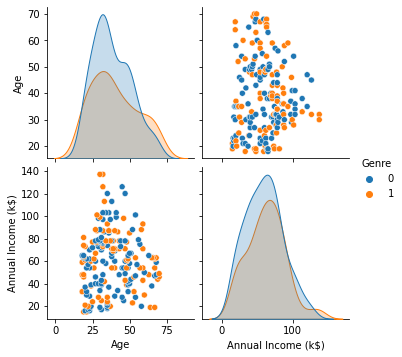

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, hue='Genre')
plt.show()

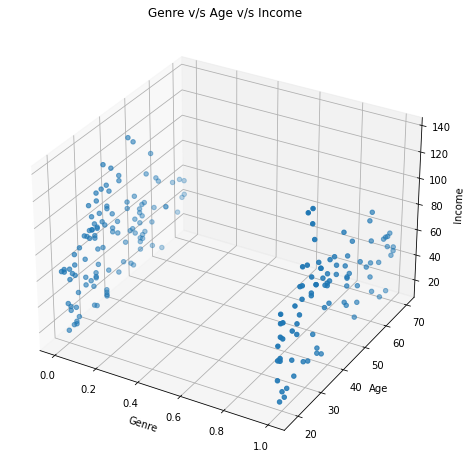

In [9]:
# 3d plot of data points
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (12 , 8))
ax = plt.axes(projection = '3d')
x = df.iloc[:, 0]
y = df.iloc[:, 1]
z = df.iloc[:, 2]
ax.scatter(x, y, z, 'blue')
ax.set_title("Genre v/s Age v/s Income")
ax.set_xlabel("Genre")
ax.set_ylabel("Age")
ax.set_zlabel("Income")
plt.show()

In [10]:
# train the model using K Mean Clustering
from sklearn.cluster import KMeans
scores = []
for i in range(1, 101):
    model=KMeans(n_clusters=i)
    model.fit(df)
    scores.append(model.inertia_)

C:\Users\SHAYANI DAS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


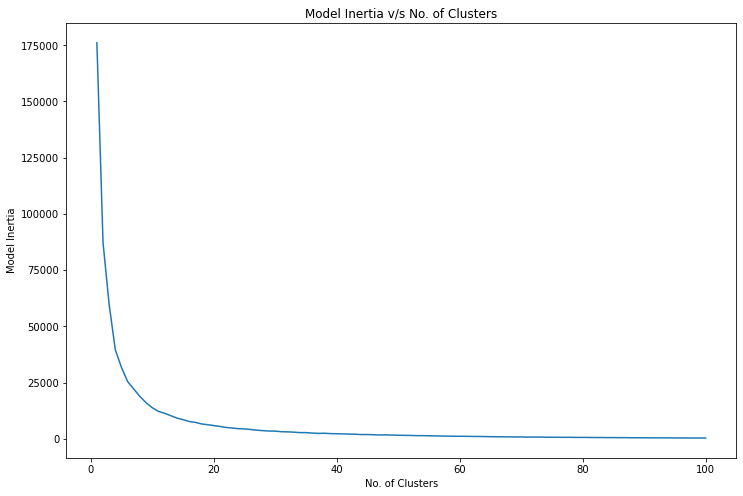

In [11]:
# plot scores for different values of k and identify the elbow point
plt.figure(figsize = (12 , 8))
plt.title("Model Inertia v/s No. of Clusters")
plt.xlabel("No. of Clusters")
plt.ylabel("Model Inertia")
plt.plot(range(1, 101), scores)
plt.show()

In [12]:
# after applying elbow method we get K = 4. Therefore we are going to form 4 clusters
perfect_model = KMeans(n_clusters = 10).fit_predict(df)
df['Spending Score (1-100)'] = undefined
df['Cluster'] = perfect_model
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,2
197,1,32,126,74,2
198,1,32,137,18,2


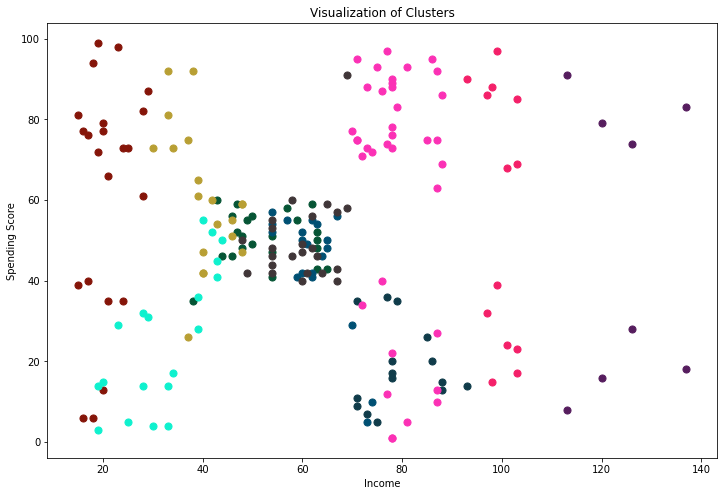

In [13]:
# visualization of clusters 
import random
colmap = ['#851509', '#103c4a', '#561d5e', '#065535', '#005073', '#f42069', '#0ff1ce', '#403638', '#b89f34', '#fb31b5']
clid = [i for i in range(10)] # cluster id
c = [] 
for i in range(10):
    c.append(df[df['Cluster'] == i]) # crop the dataset according to the cluster id
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.scatter(c[i].iloc[:, 2], c[i].iloc[:, 3], c=colmap[i], s = 50)
plt.title("Visualization of Clusters")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()